In [1]:
import numpy as np 
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import warnings         
warnings.filterwarnings("ignore")

In [2]:
dfe = pd.read_csv("dataset/resampled-train.csv")

In [3]:
X_resampled = dfe[['ODO', 'Year', 'Age', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Diesel', 'Fuel_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Owner_First', 'Owner_Fourth & Above', 'Owner_Second', 'Owner_Third']]

y_resampled = dfe['Price_Category']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




Epoch 1/50


431/431 [==============================] - 9s 8ms/step - loss: 0.2072 - accuracy: 0.9373 - val_loss: 0.0953 - val_accuracy: 0.9680
Epoch 2/50
431/431 [==============================] - 3s 6ms/step - loss: 0.0727 - accuracy: 0.9776 - val_loss: 0.0441 - val_accuracy: 0.9866
Epoch 3/50
431/431 [==============================] - 3s 6ms/step - loss: 0.0565 - accuracy: 0.9836 - val_loss: 0.0330 - val_accuracy: 0.9904
Epoch 4/50
431/431 [==============================] - 3s 6ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.0344 - val_accuracy: 0.9892
Epoch 5/50
431/431 [==============================] - 3s 6ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0271 - val_accuracy: 0.9922
Epoch 6/50
431/431 [==============================] - 3s 6ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0273 - val_accuracy: 0.9954
Epoch 7/50
431/431 [==============================] - 3s 6ms/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0215 - val_accuracy: 0.9942
Ep

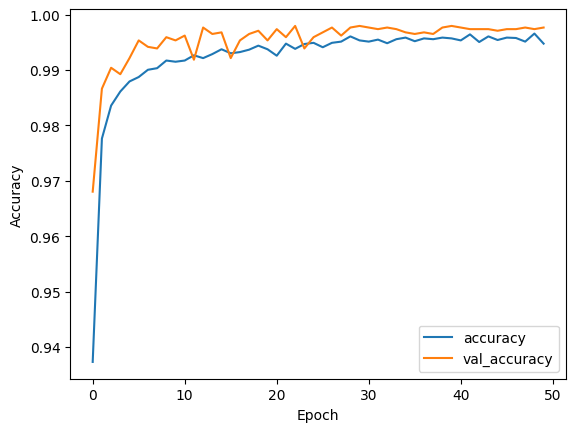

108/108 [==============================] - 1s 2ms/step
Accuracy: 0.997675094449288
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1200
           1       1.00      0.99      1.00      1122
           2       0.99      1.00      1.00      1119

    accuracy                           1.00      3441
   macro avg       1.00      1.00      1.00      3441
weighted avg       1.00      1.00      1.00      3441

Confusion Matrix:
[[1200    0    0]
 [   0 1114    8]
 [   0    0 1119]]


In [5]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

num_classes = 3  
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=num_classes, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_reshaped, y_train_cat, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test_cat), verbose=1)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

y_pred = np.argmax(model.predict(X_test_reshaped), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)


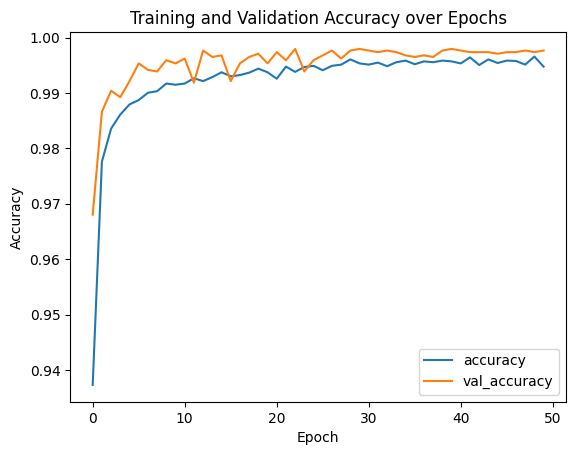

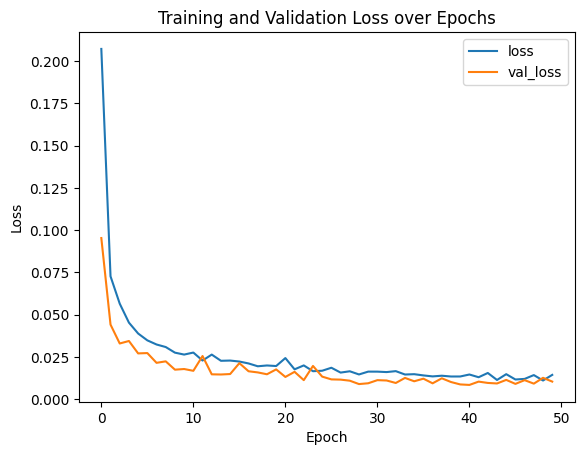

108/108 [==============================] - 0s 3ms/step
Accuracy: 0.997675094449288
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1200
           1       1.00      0.99      1.00      1122
           2       0.99      1.00      1.00      1119

    accuracy                           1.00      3441
   macro avg       1.00      1.00      1.00      3441
weighted avg       1.00      1.00      1.00      3441



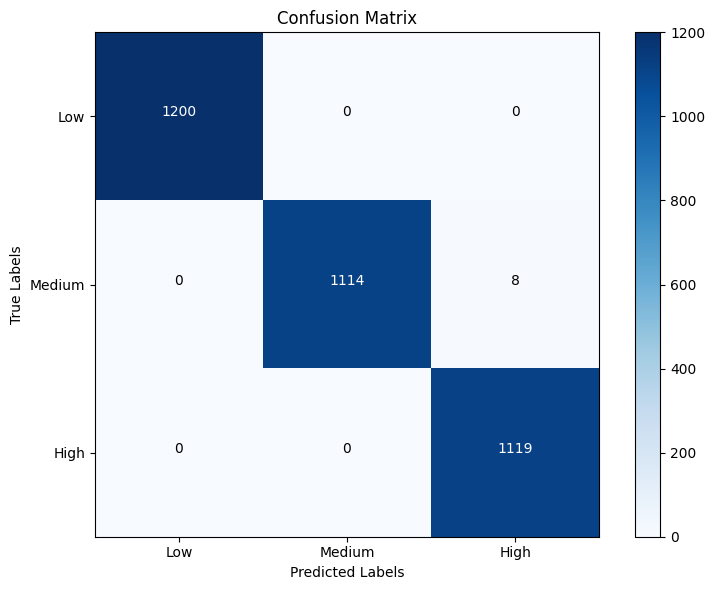

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss over Epochs')
plt.show()

y_pred = np.argmax(model.predict(X_test_reshaped), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Low', 'Medium', 'High']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_mat[i][j]), horizontalalignment='center', color='white' if conf_mat[i][j] > conf_mat.max() / 2 else 'black')

plt.show()
